Hello Michael!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text
</div>



# Title
# Description
# Procedure
1. Download and prepare the data. Explain the procedure.
2. Train and test the model for each region:
- 2.1. Split the data into a training set and validation set at a ratio of 75:25.
- 2.2. Train the model and make predictions for the validation set.
- 2.3. Save the predictions and correct answers for the validation set.
- 2.4. Print the average volume of predicted reserves and model RMSE.
- 2.5. Analyze the results.
3. Prepare for profit calculation:
- 3.1. Store all key values for calculations in separate variables.
- 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
- 3.3. Provide the findings about the preparation for profit calculation step.
4. Write a function to calculate profit from a set of selected oil wells and model predictions:
- 4.1. Pick the wells with the highest values of predictions. 
- 4.2. Summarize the target volume of reserves in accordance with these predictions
- 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
5. Calculate risks and profit for each region:
- 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
- 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
- 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.



In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 1. Download and prepare the data. Explain the procedure.

## Import each dataset

Geological exploration data for the three regions are stored in files:

In [2]:
# Import data

df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

### Prepare the data

- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- product — volume of reserves in the oil well (thousand barrels).

In [3]:
# Function to do basic exploration of datasets:

def explore_df(df):
    print(df.info())
    print()
    print(df.head(0))
    print()
    print(df.describe())
    print()
    print('Number of duplicates:')
    print(df.duplicated().sum())
    print()
    print('Number of null entries:') 
    print(df.isna().sum())

In [4]:
# Function to plot the datasets

def plot_histogram(df):

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

    sns.histplot(data=df, x="f0", kde=True, ax=axes[0, 0])
    sns.histplot(data=df, x="f1", kde=True, ax=axes[0, 1])
    sns.histplot(data=df, x="f2", kde=True, ax=axes[1, 0])
    sns.histplot(data=df, x="product", kde=True, ax=axes[1, 1])

    axes[0, 0].set_title('f0')
    axes[0, 1].set_title('f1')
    axes[1, 0].set_title('f2')
    axes[1, 1].set_title('product')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

### df0 = pd.read_csv('/datasets/geo_data_0.csv')

In [5]:
explore_df(df0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646 

In [6]:
print((df0['product'].unique()))
print()
print(df0['product'].value_counts())

[105.28006184  73.03775027  85.26564713 ...  64.37544259  74.04076435
 149.63324561]

0.000000      1
30.141653     1
56.573577     1
50.182301     1
88.989990     1
             ..
146.560758    1
155.729658    1
27.829511     1
85.382946     1
154.424007    1
Name: product, Length: 100000, dtype: int64


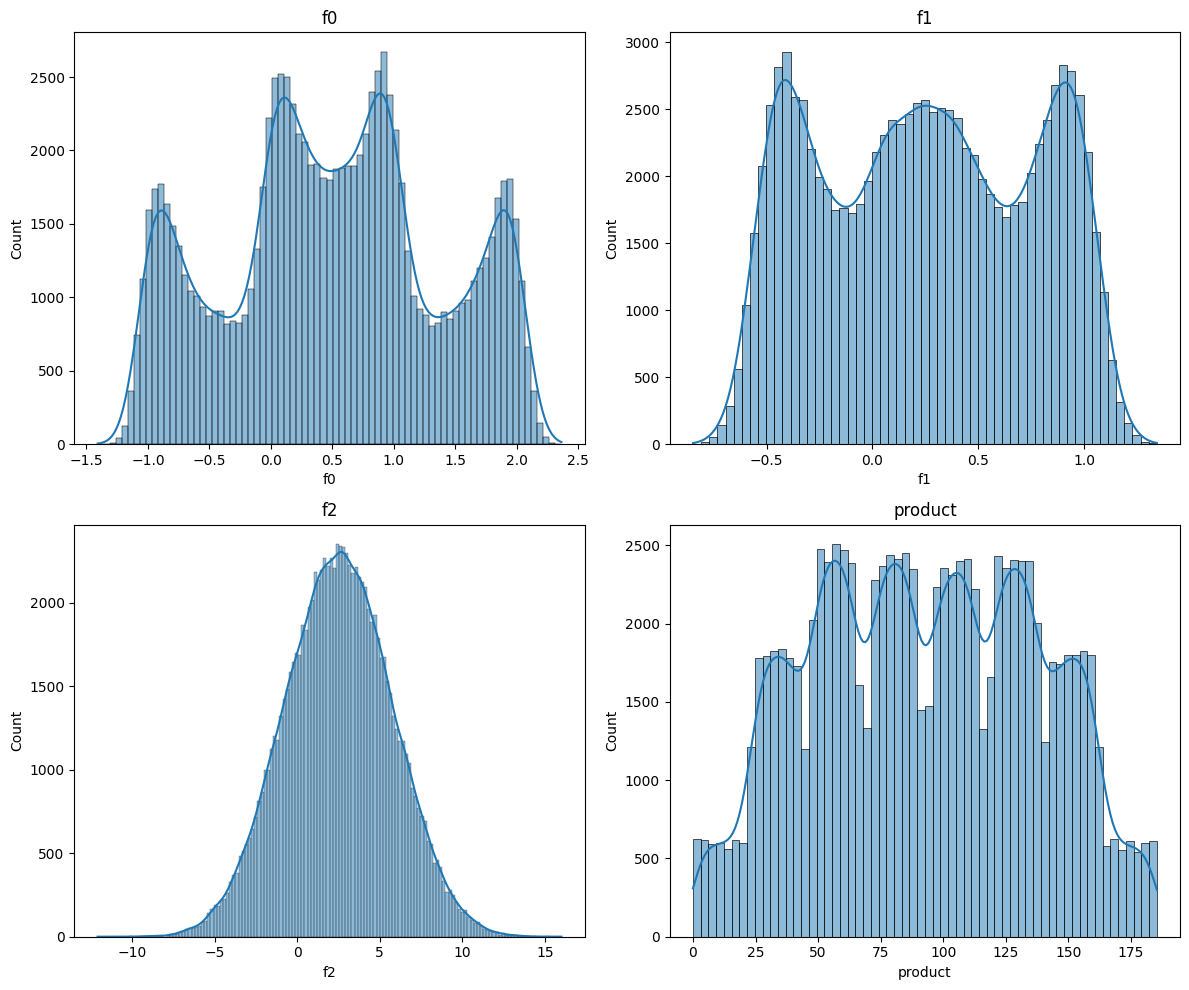

In [7]:
plot_histogram(df0)

### df1 = pd.read_csv('/datasets/geo_data_1.csv')

In [8]:
explore_df(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816 

In [9]:
# DF1 has questionable values:
# Since this is synthetic data we will accept it for now
print(df1['product'].unique())
print()
print(df1['product'].value_counts())

[  3.17910258  26.95326103 134.76630516 137.94540774  84.03888568
 110.99214671  53.90652206   0.         107.81304413  57.08562465
  30.13236361  80.85978309]

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64


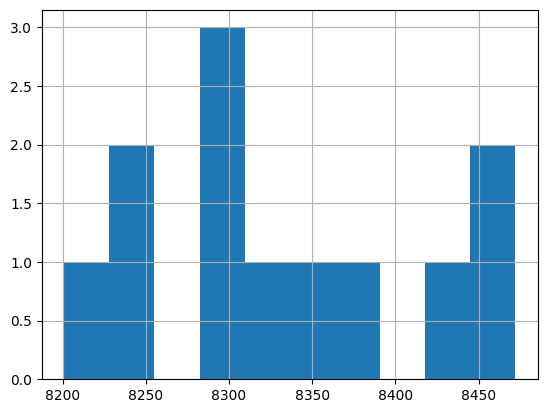

In [10]:
df1['product'].value_counts().hist()
plt.show()

In [11]:
print((df1['f0'].unique()))
print()
print((df1['f1'].unique()))
print()
print((df1['f2'].unique()))

[-15.00134818  14.27208781   6.26318735 ...  -7.37889139   0.66571381
  -3.42613898]

[-8.27599995 -3.47508322 -5.94838579 ... -3.08410387 -6.15259286
 -7.7942742 ]

[-5.87601369e-03  9.99182737e-01  5.00116016e+00 ...  4.99865060e+00
  1.00014635e+00 -3.29851829e-03]


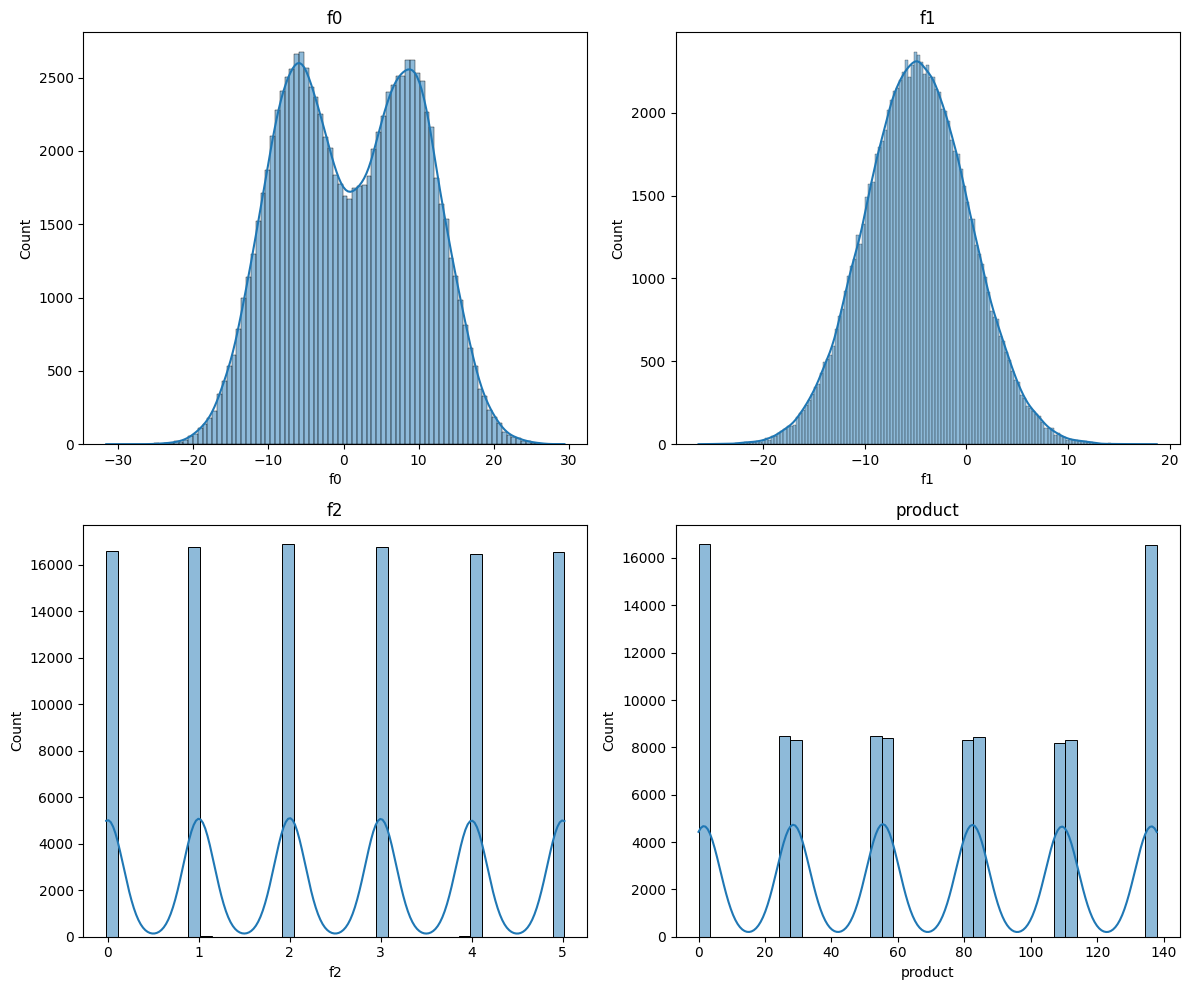

In [12]:
plot_histogram(df1)

### df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [13]:
explore_df(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Empty DataFrame
Columns: [id, f0, f1, f2, product]
Index: []

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678 

In [14]:
print((df2['product'].unique()))
print()
print(df2['product'].value_counts())

[ 27.75867323  56.06969663  62.87191005 ... 157.08007975  51.79525299
 102.77576749]

0.000000      1
53.211205     1
37.811021     1
84.266951     1
38.939298     1
             ..
122.326832    1
34.629840     1
3.577922      1
0.937771      1
49.640390     1
Name: product, Length: 100000, dtype: int64


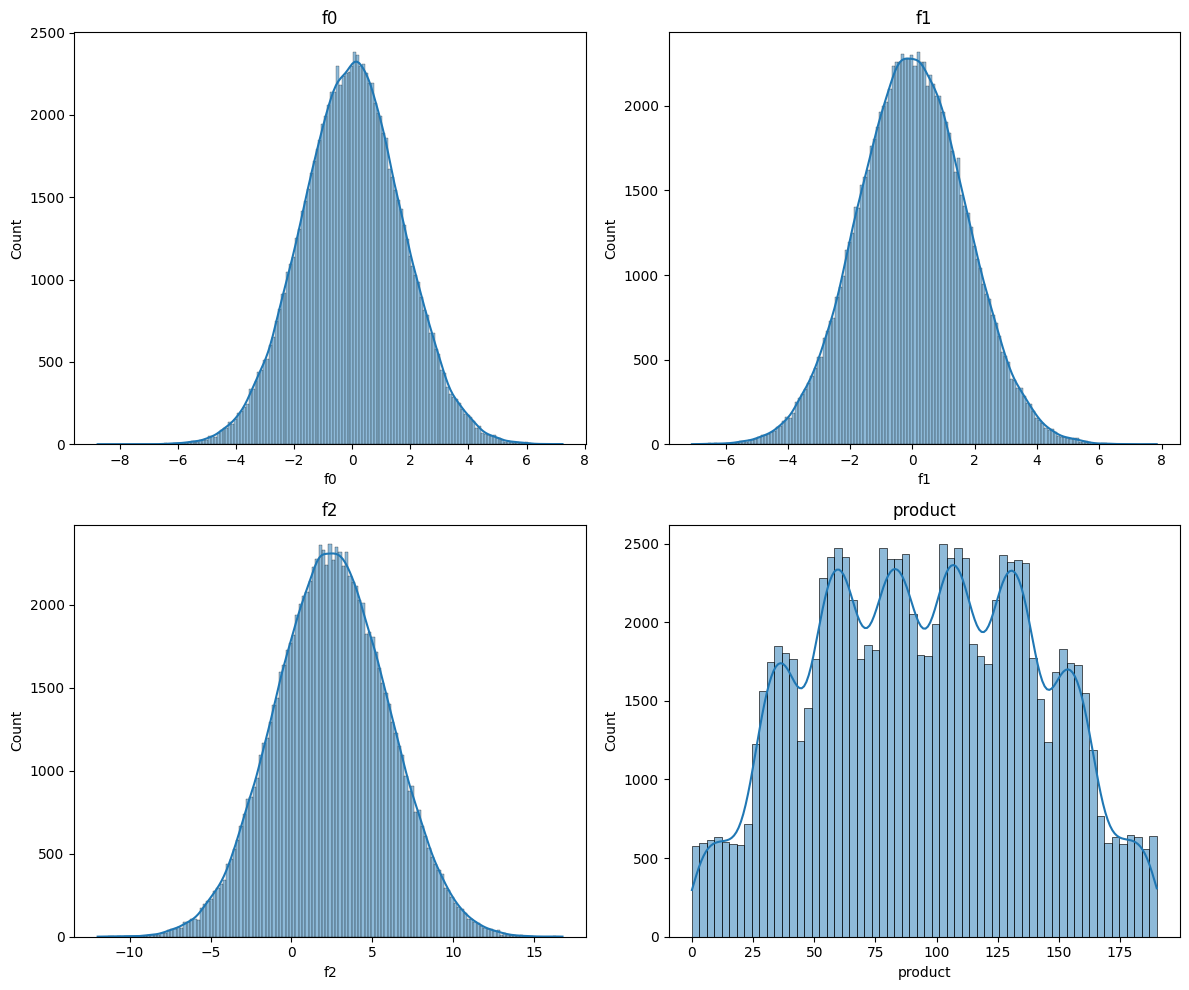

In [15]:
plot_histogram(df2)

All datasets have been read and examined.

df1, geo_data_1.csv, contains questionable data. The 'product' contains only the following values:
- 53.906522     8472
- 26.953261     8468
- 84.038886     8431
- 57.085625     8390
- 3.179103      8337
- 80.859783     8320
- 30.132364     8306
- 134.766305    8304
- 110.992147    8303
- 0.000000      8235
- 137.945408    8233
- 107.813044    8201
Since the data provided is synthetic, it will be used with the assumption it is intentional.

## Train and test the model for each region:

2. Train and test the model for each region:
- 2.1. Split the data into a training set and validation set at a ratio of 75:25.
- 2.2. Train the model and make predictions for the validation set.
- 2.3. Save the predictions and correct answers for the validation set.
- 2.4. Print the average volume of predicted reserves and model RMSE.
- 2.5. Analyze the results.

### Split the data into a training set and validation set at a ratio of 75:25.

In [16]:
def split_data(df):
    features = df.drop(['product', 'id'], axis=1)
    target = df['product']

    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
        
    return features_train, features_valid, target_train, target_valid

features_train0, features_valid0, target_train0, target_valid0 = split_data(df0)
features_train1, features_valid1, target_train1, target_valid1 = split_data(df1)
features_train2, features_valid2, target_train2, target_valid2 = split_data(df2)


### Train the model and make predictions for the validation set.

Conditions:
- Only linear regression is suitable for model training (the rest are not sufficiently predictable).

In [17]:
def train_model(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    #mse = mean_squared_error(target_valid, predictions)
    #print(mse)
    return pd.DataFrame({'predictions': predictions, 'actual': target_valid})

### Save the predictions and correct answers for the validation set.

In [18]:
#df0:
results0 = train_model(features_train0, features_valid0, target_train0, target_valid0)

#df1:
results1 = train_model(features_train1, features_valid1, target_train1, target_valid1)

#df2:
results2 = train_model(features_train2, features_valid2, target_train2, target_valid2)


### Print the average volume of predicted reserves and model RMSE.

In [19]:
def predicted_reserves(results):
    mse = mean_squared_error(results['actual'], results0['predictions'])
    rmse = mse**0.5
    average_volume = results['predictions'].mean()
    print(f'Average volume of predicted reserves: {average_volume:.2f}')
    print(f'model RMSE: {rmse:.2f}')
    return average_volume

print('Region 0:')
avg_volume0 = predicted_reserves(results0)
print()
print('Region 1:')
avg_volume1 = predicted_reserves(results1)
print()
print('Region 2:')
avg_volume2 = predicted_reserves(results2)

Region 0:
Average volume of predicted reserves: 92.59
model RMSE: 37.58

Region 1:
Average volume of predicted reserves: 68.73
model RMSE: 56.82

Region 2:
Average volume of predicted reserves: 94.97
model RMSE: 50.50


### Analyze the results

In [20]:
def analyze_results(results):
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    
    sns.histplot(ax=axes[0], data=results, x="actual", kde=True)
    sns.histplot(ax=axes[0], data=results, x="predictions", kde=True)
    
    sns.boxplot(ax=axes[1], data=results[['actual', 'predictions']])

    axes[0].set_title('Actual - Predicted')
    axes[1].set_title('Actual - Predicted')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

    # Print RMSE and MAE

    rmse = np.sqrt(mean_squared_error(results['actual'], results['predictions']))
    mae = mean_absolute_error(results['actual'], results['predictions'])

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    

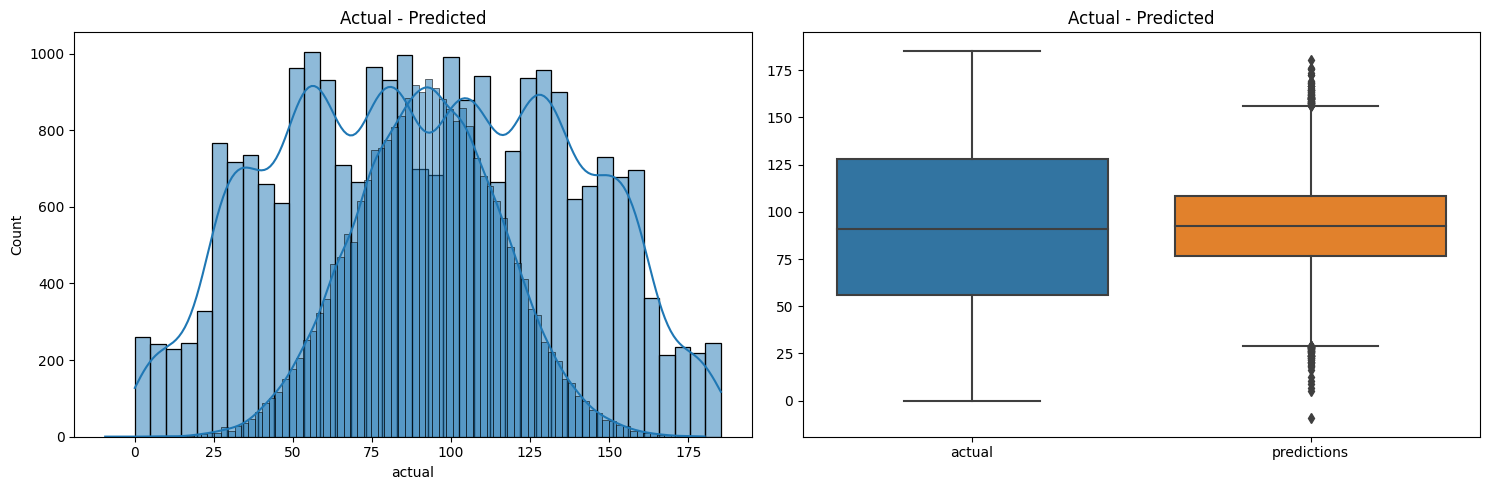

RMSE: 37.5794217150813
MAE: 30.919600777151313


In [21]:
analyze_results(results0)

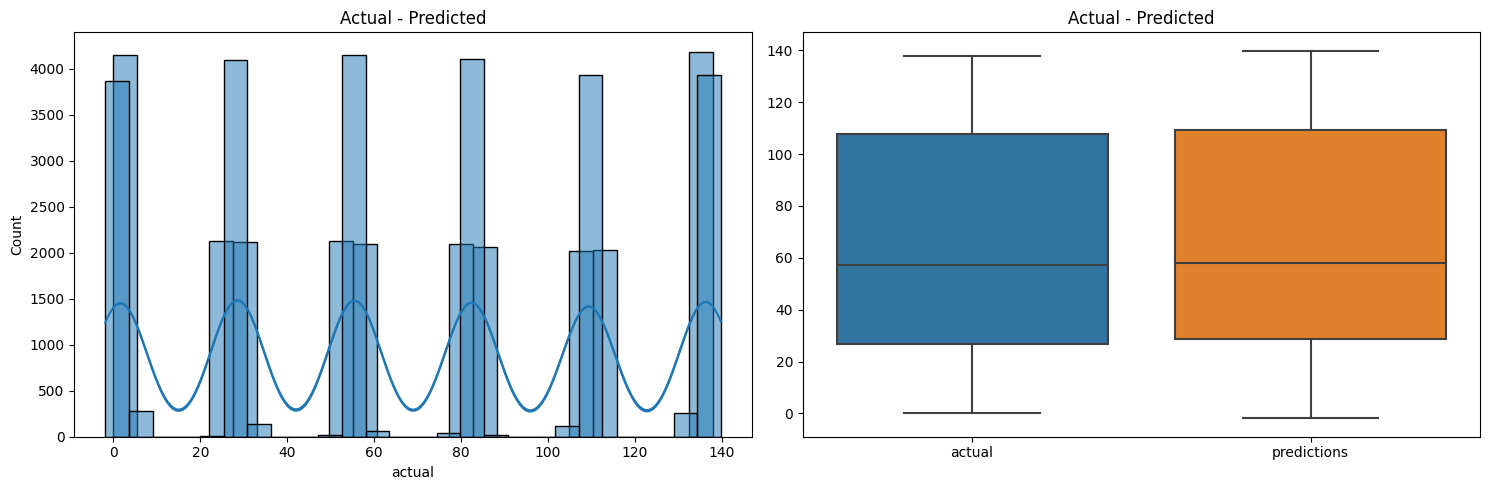

RMSE: 0.893099286775617
MAE: 0.7187662442124758


In [22]:
analyze_results(results1)

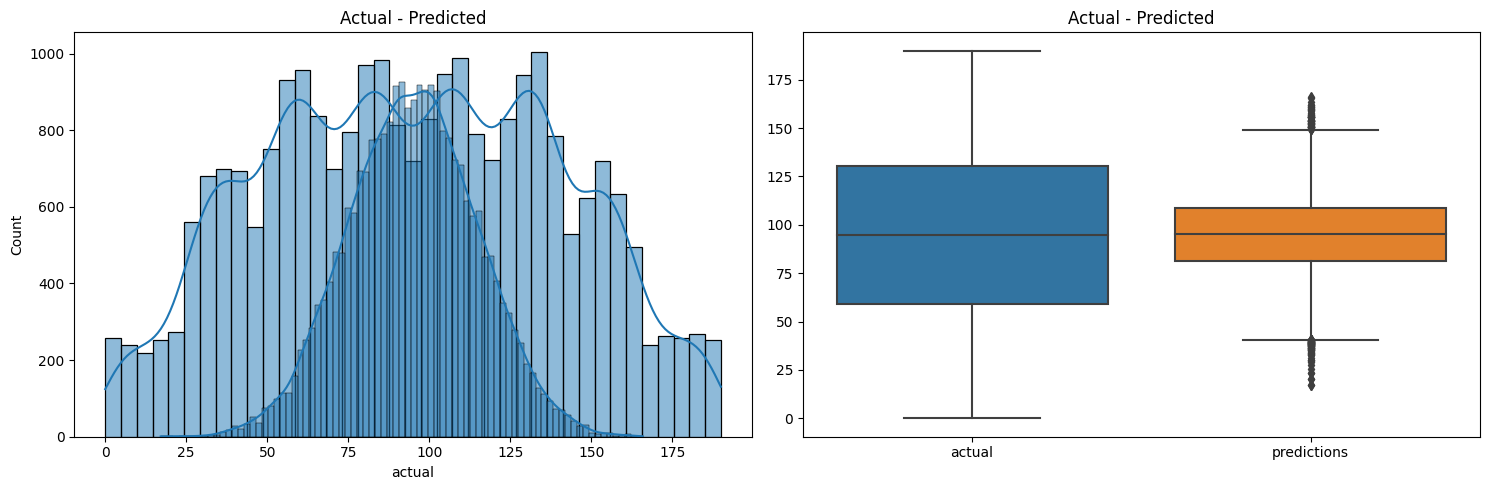

RMSE: 40.02970873393434
MAE: 32.792652105481814


In [23]:
analyze_results(results2)

Region 0:
Average volume of predicted reserves: 92.59
model RMSE: 37.58

Region 1:
Average volume of predicted reserves: 68.73
model RMSE: 56.82

Region 2:
Average volume of predicted reserves: 94.97
model RMSE: 50.50

## Prepare for profit calculation

3. Prepare for profit calculation:
- 3.1. Store all key values for calculations in separate variables.
- 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

### Store all key values for calculations in separate variables.

product — volume of reserves in the oil well (thousand barrels).

Conditions:
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).


In [24]:
# The budget for development of 200 oil wells is 100 USD million
budget = 100000000.00 # (USD)
num_wells = 200

budget_per_well = budget/num_wells

# One barrel of raw materials brings 4.5 USD of revenue
revenue_per_barrel = 4.50 # (USD)

# The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
revenue_per_unit = revenue_per_barrel * 1000 # (USD) 

### Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [25]:
min_volume = budget / (num_wells * revenue_per_unit)

In [26]:
print(f'The budget for development of {num_wells} wells is ${budget:.2f}.')
print(f'Revenue from ne barrel brings ${revenue_per_barrel:.2f}.')
print(f'Revenue from one product is ${revenue_per_unit:.2f}.')
print()
print(f'To develop {num_wells}, the amount of reserves should be: {min_volume:.2f}')

The budget for development of 200 wells is $100000000.00.
Revenue from ne barrel brings $4.50.
Revenue from one product is $4500.00.

To develop 200, the amount of reserves should be: 111.11


In [27]:

print(f"Minimum reserves sufficient for developing a new well without losses: {min_volume:.2f}")
print(f"Average volume of reserves in Region 0: {avg_volume0:.2f}, a shortage of {min_volume - avg_volume0:.2f}")
print(f"Average volume of reserves in Region 1: {avg_volume1:.2f}, a shortage of {min_volume - avg_volume1:.2f}")
print(f"Average volume of reserves in Region 2: {avg_volume2:.2f}, a shortage of {min_volume - avg_volume2:.2f}")

region = ['min', 'region 0', 'region 1', 'region 2']
avg_volume = [min_volume, avg_volume0, avg_volume1, avg_volume2]
avg_volume_dif = [0,min_volume - avg_volume0, min_volume -avg_volume1,min_volume - avg_volume2]



Minimum reserves sufficient for developing a new well without losses: 111.11
Average volume of reserves in Region 0: 92.59, a shortage of 18.52
Average volume of reserves in Region 1: 68.73, a shortage of 42.38
Average volume of reserves in Region 2: 94.97, a shortage of 16.15


### Provide the findings about the preparation for profit calculation step.

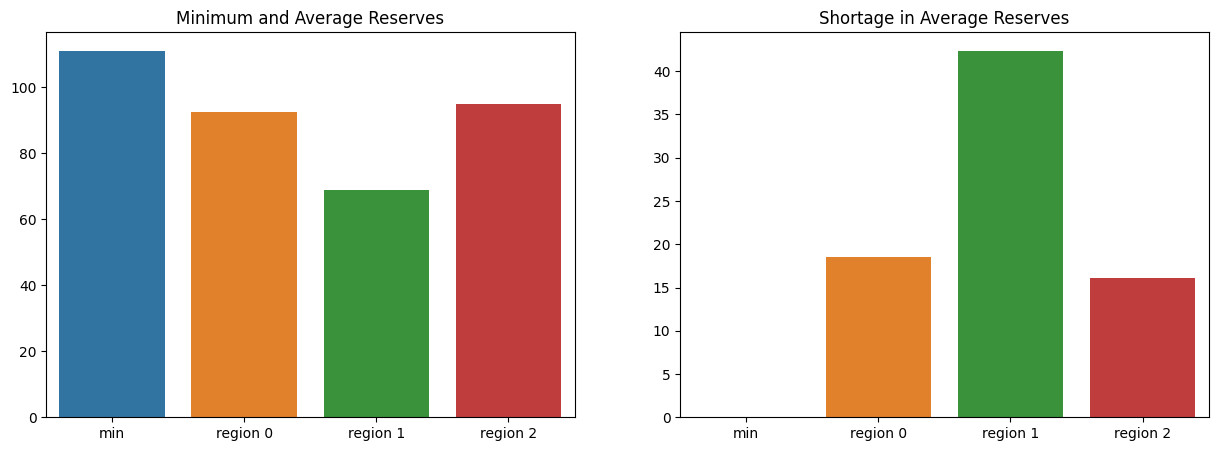

In [28]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(ax=axes[0], x=region, y=avg_volume)
sns.barplot(ax=axes[1], x=region, y=avg_volume_dif)

axes[0].set_title("Minimum and Average Reserves")
axes[1].set_title("Shortage in Average Reserves")

plt.show()



Given the constants:
- The budget for development of 200 wells is 100000000.00 (USD). 
- Revenue from one barrel brings 4.50 (USD). 
- Revenue from one unit of product, one thousand barrels, is 4500.00 (USD).


The minimum reserves sufficient for developing 200 new wells without losses is 111.11 thousand barrels.

The average volume of reserves in each region are:
- Region 0 is 92.59, a shortage of 18.52 thousand barrels.
- Region 1 is 68.73, a shortage of 42.38 thousand barrels.
- Region 2 is 94.97, a shortage of 16.15 thousand barrels.

All regions have an average reserve below the minimum sufficient for developing a new well without losses. 

## Write a function to calculate profit from a set of selected oil wells and model predictions:


4. Write a function to calculate profit from a set of selected oil wells and model predictions:
- 4.1. Pick the wells with the highest values of predictions. 
- 4.2. Summarize the target volume of reserves in accordance with these predictions
- 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

Get the 200 wells with the highest predicted values in each region. - sort based on predictions, keep 200
Use the actual for calculating


### Pick the wells with the highest values of predictions.

In [29]:
def get_top_wells(results, top=num_wells):
    return results.sort_values(by='predictions', ascending=False).head(top)

top_wells0 = get_top_wells(results0)
top_wells1 = get_top_wells(results1)
top_wells2 = get_top_wells(results2)


### Summarize the target volume of reserves in accordance with these predictions.

In [30]:
def summarize_reserve(results, min_volume=min_volume):
    # How far off from the predictions are the actual volume
    results['actual - predictions'] = results['actual']-results['predictions']
    
    # How far off from the target is the actual volume:
    results['actual - target']=results['actual']-min_volume
    return(results)

top_wells0 = summarize_reserve(top_wells0)
top_wells1 = summarize_reserve(top_wells1)
top_wells2 = summarize_reserve(top_wells2)


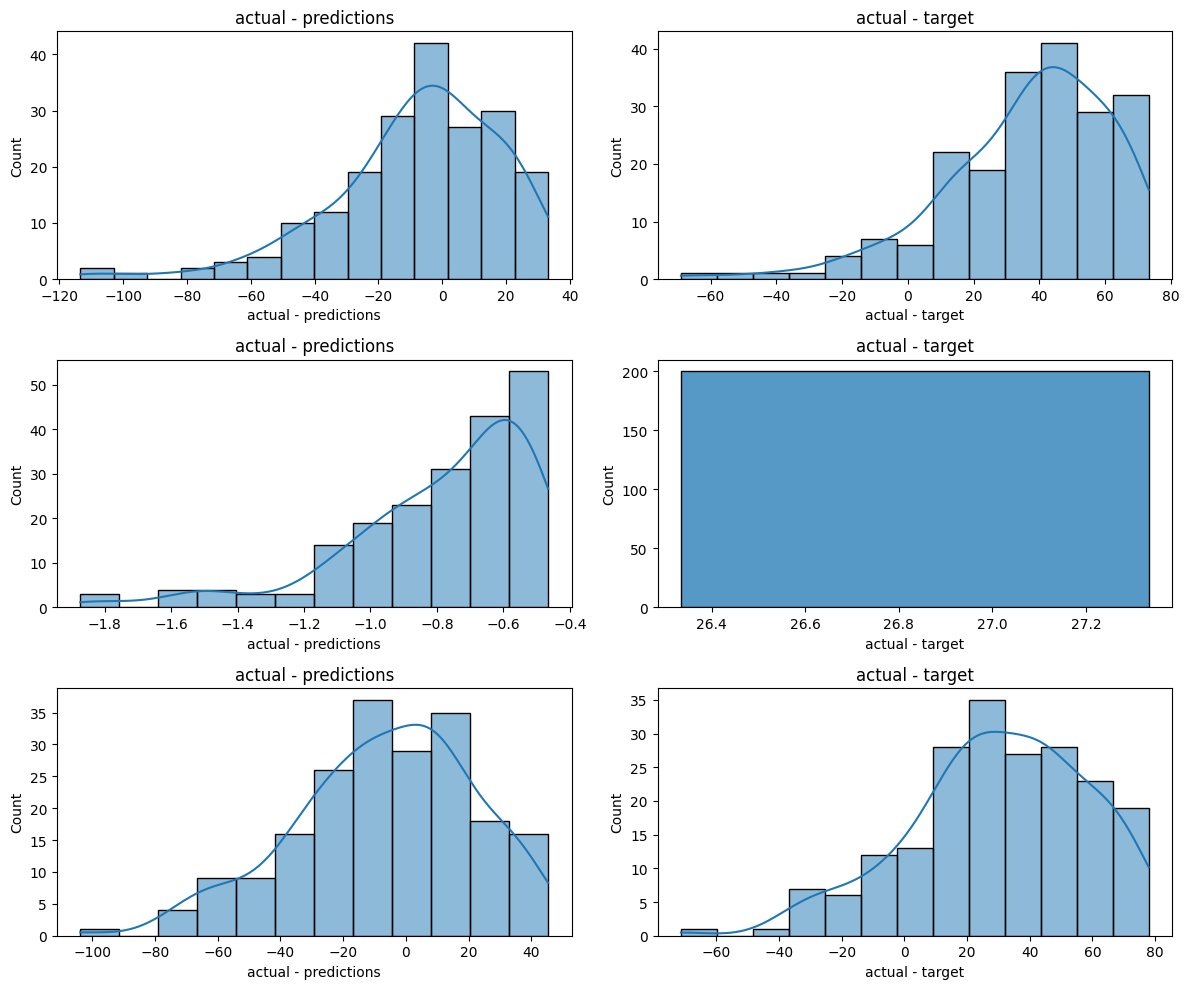

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 2x2 grid

sns.histplot(data=top_wells0, x="actual - predictions", kde=True, ax=axes[0, 0])
sns.histplot(data=top_wells0, x="actual - target", kde=True, ax=axes[0, 1])
sns.histplot(data=top_wells1, x="actual - predictions", kde=True, ax=axes[1, 0])
sns.histplot(data=top_wells1, x="actual - target", ax=axes[1, 1])
sns.histplot(data=top_wells2, x="actual - predictions", kde=True, ax=axes[2, 0])
sns.histplot(data=top_wells2, x="actual - target", kde=True, ax=axes[2, 1])

axes[0, 0].set_title('actual - predictions')
axes[0, 1].set_title('actual - target')
axes[1, 0].set_title('actual - predictions')
axes[1, 1].set_title('actual - target')
axes[2, 0].set_title('actual - predictions')
axes[2, 1].set_title('actual - target')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [32]:
column_names=['region', 'total predicted', 'total actual', 'percent change volume','actual - predicted', 'actual - target', 'predicted profit', 'actual profit', 'percent change profit']
region_summary = pd.DataFrame(columns=column_names)

def total_profit(total_volume, revenue_per_unit=revenue_per_unit, budget=budget):
    return (total_volume * revenue_per_unit - budget)/1000000 # GET RESULTS IN MILLION USD

def summarize_region(results, region_number, revenue_per_unit=revenue_per_unit, budget=budget):
    total_predicted = results['predictions'].sum()
    total_actual = results['actual'].sum()
    percent_change_volume = ((total_actual - total_predicted) / total_predicted)*100
    total_dif_predict = results['actual - predictions'].sum()
    total_dif_target = results['actual - target'].sum()
    profit_predict = total_profit(total_predicted)
    profit_actual = total_profit(total_actual)
    percent_change_profit = ((profit_actual - profit_predict) / profit_predict) * 100
    
    summary = [region_number, total_predicted, total_actual, percent_change_volume, total_dif_predict, total_dif_target, profit_predict, profit_actual, percent_change_profit]
    return summary

region_summary.loc[len(region_summary)] = summarize_region(top_wells0, 'region 0')
region_summary.loc[len(region_summary)] = summarize_region(top_wells1, 'region 1')
region_summary.loc[len(region_summary)] = summarize_region(top_wells2, 'region 2')


### Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [33]:
print(region_summary)

     region  total predicted  total actual  percent change volume  \
0  region 0     31102.330839  29601.835651              -4.824382   
1  region 1     27746.026782  27589.081548              -0.565649   
2  region 2     29603.898658  28245.222141              -4.589519   

   actual - predicted  actual - target  predicted profit  actual profit  \
0        -1500.495187      7379.613429         39.960489      33.208260   
1         -156.945234      5366.859326         24.857121      24.150867   
2        -1358.676517      6022.999919         33.217544      27.103500   

   percent change profit  
0             -16.897262  
1              -2.841252  
2             -18.406070  


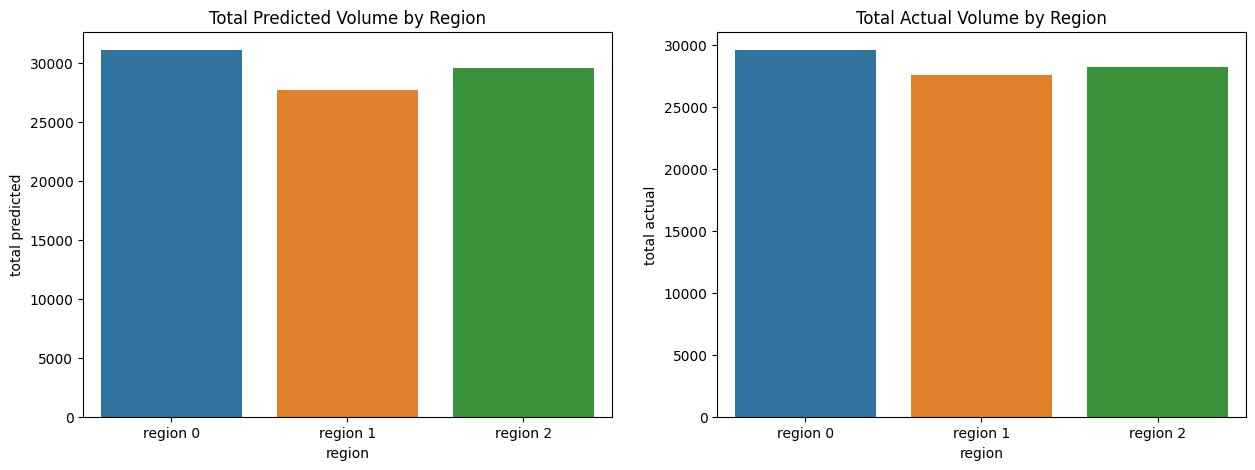

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(ax=axes[0], x='region', y='total predicted', data=region_summary)
sns.barplot(ax=axes[1], x='region', y='total actual', data=region_summary)

axes[0].set_title("Total Predicted Volume by Region")
axes[1].set_title("Total Actual Volume by Region")

plt.show()

In [35]:
print(region_summary[['region','total predicted', 'total actual']])

     region  total predicted  total actual
0  region 0     31102.330839  29601.835651
1  region 1     27746.026782  27589.081548
2  region 2     29603.898658  28245.222141


Region 0 has the highest predicted and actual volume.

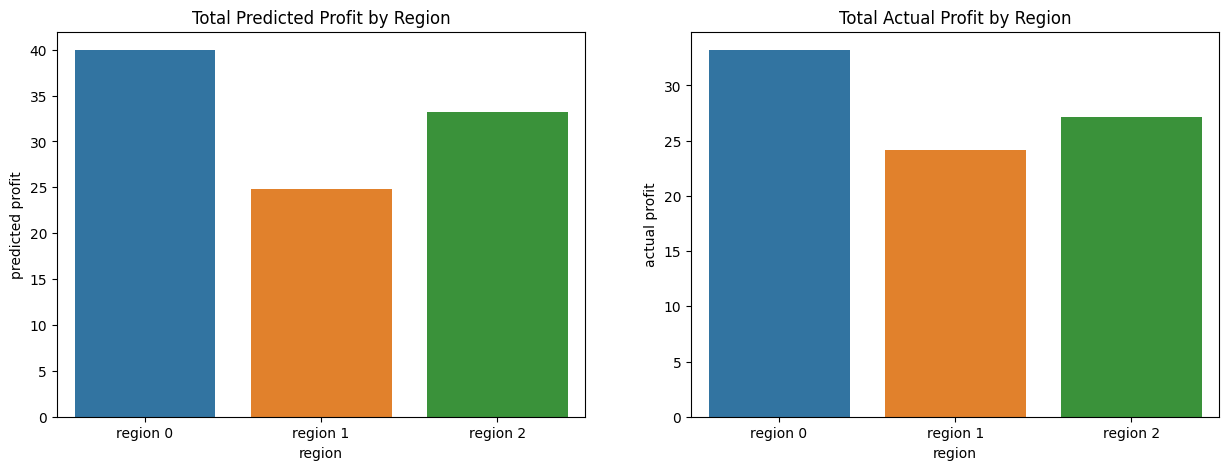

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(ax=axes[0], x='region', y='predicted profit', data=region_summary)
sns.barplot(ax=axes[1], x='region', y='actual profit', data=region_summary)

axes[0].set_title("Total Predicted Profit by Region")
axes[1].set_title("Total Actual Profit by Region")

plt.show()

In [37]:
print(region_summary[['region','predicted profit','actual profit']])

     region  predicted profit  actual profit
0  region 0         39.960489      33.208260
1  region 1         24.857121      24.150867
2  region 2         33.217544      27.103500


Region 0 has the highest predicted and actual profit.

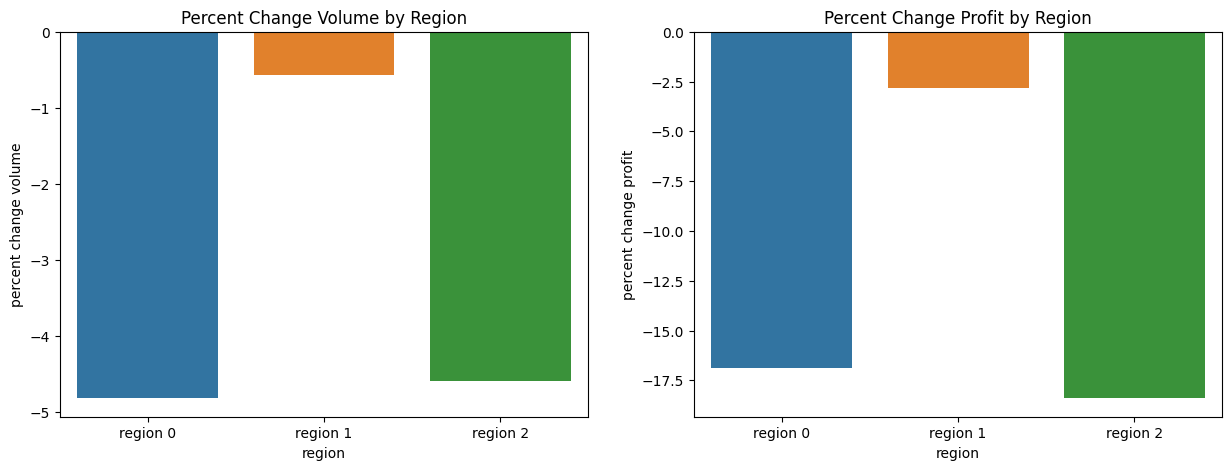

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(ax=axes[0], x='region', y='percent change volume', data=region_summary)
sns.barplot(ax=axes[1], x='region', y='percent change profit', data=region_summary)

axes[0].set_title("Percent Change Volume by Region")
axes[1].set_title("Percent Change Profit by Region")

plt.show()

In [39]:
print(region_summary[['region','percent change volume', 'percent change profit']])

     region  percent change volume  percent change profit
0  region 0              -4.824382             -16.897262
1  region 1              -0.565649              -2.841252
2  region 2              -4.589519             -18.406070


Region 1 was the closest to the predicted volume and profit. 
Region 0 and 2 are both significantly underperforming in volume and profit indicating an issue with the predictions or performance of the region.

Region 0 has the highest predicted and actual volume:
- 31102 and 29601.

Region 0 has the highest predicted and actual profit:
- 39.96 and 33.20 Million USD

Region 1 has the closets percent change volume and profit:
- -0.5% and -2.8%

While region 0 has the highest volume and profit, the region is significantly underperforming the predicted results. Region 1, however, is showing stability in both volume and profit.

## Calculate risks and profit for each region:


5. Calculate risks and profit for each region:
- 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
- 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
- 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

### Use the bootstrapping technique with 1000 samples to find the distribution of profit.

In [40]:
# Function to calculate profit
def calculate_profit(results, wells_production=num_wells):
    # Create DataFrame for sorting
    
    # Select top wells based on predicted values
    top_200 = results.sort_values(by="predictions", ascending=False).head(wells_production)

    # Calculate total reserves based on actual target values
    total_reserves = top_200["actual"].sum()
    profit = total_reserves * 4500.00 - 100000000.00

    return profit

# Function for bootstrapping
def bootstrap_profit(results, n_samples=1000, sample_size=500):
    profits = []
    
    # Convert inputs to Pandas DataFrame to use .sample()

    for _ in range(n_samples):
        # Sample with replacement using .sample()
        sample = results.sample(n=sample_size, replace=True, random_state=None)
        
        # Calculate profit
        sample_profit = calculate_profit(sample)
        profits.append(sample_profit)

    profits = np.array(profits)
    lower = np.percentile(profits, 2.5)
    upper = np.percentile(profits, 97.5)
    loss_risk = np.mean(profits < 0) * 100
    
    return np.mean(profits), lower, upper, loss_risk

# Calculate profit for each region
profit_0 = calculate_profit(results0)
profit_1 = calculate_profit(results1)
profit_2 = calculate_profit(results2)

print(f"Profit for Region 0: ${profit_0:,.2f}")
print(f"Profit for Region 1: ${profit_1:,.2f}")
print(f"Profit for Region 2: ${profit_2:,.2f}")

Profit for Region 0: $33,208,260.43
Profit for Region 1: $24,150,866.97
Profit for Region 2: $27,103,499.64


### Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

In [41]:
def get_bootstrap(results, i):
    mean_profit, lower, upper, loss_risk = bootstrap_profit(results)
    print(f"Region {i}:")
    print(f"  Average profit: ${mean_profit:,.2f}")
    print(f"  95% confidence interval: ${lower:,.2f} to ${upper:,.2f}")
    print(f"  Risk of loss: {loss_risk:.2f}%\n")
    
get_bootstrap(results0, 0)
get_bootstrap(results1, 1)
get_bootstrap(results2, 2)

Region 0:
  Average profit: $3,952,097.23
  95% confidence interval: $-793,120.82 to $8,827,765.74
  Risk of loss: 5.20%

Region 1:
  Average profit: $4,594,588.81
  95% confidence interval: $267,810.43 to $8,750,203.83
  Risk of loss: 1.60%

Region 2:
  Average profit: $4,055,066.95
  95% confidence interval: $-1,124,212.78 to $9,044,534.91
  Risk of loss: 6.90%



### Provide findings: suggest a region for development of oil wells and justify the choice.

The summary for each region:

Region 0:
- Actual volume: 29601
- Actual Profit: 33,208,260.43
- Average profit: 3,734,300.00
- 95% confidence interval: -1,516,589.96 to 8,918,520.78
- Risk of loss: 7.60%

Region 1:
- Actual volume: 2758
- Actual profit: 24,150,866.97
- Average profit: 4,550,879.75
- 95% confidence interval: 367,345.72 to 8,544,400.13
- Risk of loss: 1.30%

Region 2:
- Actual volume: 28245
- Actual profit: 27,103,499.64
- Average profit: 3,975,076.75
- 95% confidence interval: -1,571,284.12 to 9,367,518.11
- Risk of loss: 7.20%

While Region 0 initiialy looked promising, the high discrepancy between predicted and actual results, combined with the high risk of Loss, draws questions onto the area's performance. Region 1 is the safest region to explore with high confidence and low risk of loss.

<div class="alert alert-success">
<b>Reviewer's comment V1</b>

You did a great job! Everything is correct. Your EDA part is awesome! Well done!

The only one thing it's better to fix is to use any number instead of None as random_state. It will make your results reproducible.
    
</div>